------------------------------------------------------------------------------

# **CP02 - Modelo de ML Previsão de Aluguel - Inclusão de modelo KNN**



------------------------------------------------------------------------------

# Introdução:
No cenário atual do mercado imobiliário, o "Sexto Andar" busca otimizar a precificação dos imóveis cadastrados em sua plataforma, de modo a tornar os aluguéis mais justos, competitivos e atrativos tanto para locadores quanto para locatários. Uma das principais variáveis de sucesso nesse modelo de negócios está em proporcionar uma estimativa de preço de aluguel preciso, levando em consideração uma série de fatores que influenciam a demanda e o valor real dos imóveis.

O desafio é construir um modelo de previsão que leve em conta uma série de variáveis, algumas quantitativas, como área e quantidade de quartos, e outras qualitativas, como a permissão para animais ou a presença de móveis no imóvel. Para isso, o uso de algoritmos de aprendizado de máquina (machine learning) poderá ser uma solução eficiente, permitindo que o sistema identifique padrões e relacione variáveis que impactam diretamente no preço de aluguel.

#Objetivo do Modelo:

O objetivo principal deste modelo é prever o preço adequado de aluguel para os imóveis cadastrados na plataforma "Sexto Andar". Isso será feito a partir da análise das variáveis fornecidas, com o intuito de otimizar os valores de aluguel para que atendam tanto aos critérios do locador quanto aos do locatário, garantindo competitividade e rentabilidade para ambas as partes.

#Variáveis Disponíveis:
O modelo de previsão será alimentado com um conjunto de variáveis que refletem as características do imóvel e aspectos relacionados à sua localização e infraestrutura. As variáveis disponíveis para construir esse modelo são:
1. Cidade: Cidade onde está localizada o imóvel
2. Área: Área em m² do imóvel
3. quartos: Quantidade de quartos
4. banheiros: Quantidade de banheiros
5. Garagem: Quantidade de vagas na garagem
6. Andar: Andar da casa
7. Animal: Se permite ou não animal doméstico
8. Mobiliado: Se o imóvel está ou não mobiliado (dataset  = mobiliaria)
9. Condomínio: Valor da taxa de condomínio R$

10. Valor Aluguel: Valor do aluguel R$

11. Valor IPTU: Valor do IPTU R$

12. Valor Seguro R$ : Valor do seguro de incêndio

13. Total R$: Valor total de aluguel do imóvel

------------------------------------------------------------------------------

####Trataremos de um problema de Regressão (Regressão linear) com a váriavel de resposta "Valor Aluguel".

####Adicionaremos modelo de KNN para avaliar o melhor modelo para esta situação.
------------------------------------------------------------------------------

Definiremos o melhor modelo a ser utilizado avaliando as métricas de medição de erros que serão disponibilizadas durante o processamento do modelo.

Faremos a execução por váriavel, inciando pela váriavel área e analisando os resultados juntamente com as demais variáveis.

Após a primeira validação, deve-se incluir a váriavel "Mobiliado [Sim:1/Não:0]" para ver se o EQM melhora o resultado

E por último, incluir a váriavel "Número de Quartos" para ver se houve melhora no EQM com mais esta váriavel.

------------------------------------------------------------------------------

# 0. Incluindo todas as bibliotecas necessárias para o processamento

In [ ]:
import pandas as pd #processamento dados
import matplotlib.pyplot as plt #visualização dados
import matplotlib.cm as cm #visualização dados
import seaborn as sns # biblioteca para gráficos
import numpy as np #processamento dados
#sklearn biblioteca de machine learning que tem subseções como metrics, linear_model, decision_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV # importando a funcao hold-out
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # importando a funcao erro quadratico medio
# K-Nearest Neighbors (KNN) para identificação do melhor K
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Coletando Dados

In [ ]:
dados=pd.read_csv("/content/aluguel.csv", delimiter=";")


In [ ]:
type(dados) #tipo de objeto, dados é dataframe do pandas

pandas.core.frame.DataFrame

In [ ]:
dados.head(10) # visualizando as 10 primeiras linhas

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
5,São Paulo,376,3,3,7,0,1,0,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,1,1,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,1,1,590,2300,35,30,2955


In [ ]:
dados.describe() #resumo estatístico das variáveis numéricas

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.000000,10685.00000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,149.155452,2.50613,2.235751,1.608797,5.043332,0.777913,0.243706,918.745905,3890.416004,335.563032,53.218811,5198.132616
std,537.159483,1.17086,1.406287,1.588426,5.358497,0.415669,0.429338,1166.977706,3381.827918,677.795945,47.350550,4473.376271
min,11.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.00000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.000000
50%,90.000000,2.00000,2.000000,1.000000,3.000000,1.000000,0.000000,560.000000,2650.000000,125.000000,36.000000,3578.000000
75%,182.000000,3.00000,3.000000,2.000000,8.000000,1.000000,0.000000,1235.000000,5000.000000,375.000000,68.000000,6758.000000
max,46335.000000,13.00000,10.000000,12.000000,51.000000,1.000000,1.000000,32000.000000,30000.000000,28120.000000,451.000000,32750.000000


Analisando as váriaveis do dataset, podemos chegar a algumas conclusões:

1 - Área : A área das propriedades varia bastante, com um desvio padrão muito alto, o que indica uma grande dispersão dos valores. Há alguns imóveis com áreas extremamente grandes (até 46.335 m²), o que pode sugerir a presença de imóveis comerciais ou propriedades muito amplas

2 - Quartos : A maioria das propriedades possui de 1 a 3 quartos, com a média sendo ligeiramente acima de 2 quartos. O máximo de 13 quartos é um valor atípico, possivelmente representando casas de grande porte.

3 - Mobiliario - A maioria dos imóveis (76%) não possuem móveis, o que representa uma baixa disponibilização de imóveis com infra-estrutura prévia para locação.

4 - Valor total - o valor total contempla a soma das váriaveis valor condomínio, de aluguel, IPTU e Seguro. Esta variável possui grande variação o que reflete imóveis em diferentes faixas de preço e de diferentes tipos e tamanhos.

In [ ]:
dados.shape # quantidade de linhas e colunas

(10685, 13)

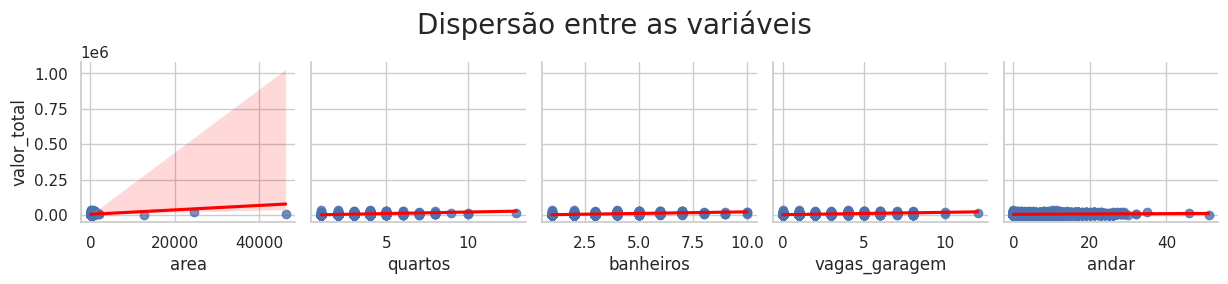

In [ ]:
#graficos das variaveis do banco
ax = sns.pairplot(dados.loc[:,['area', 'quartos', 'banheiros', 'vagas_garagem', 'andar', 'valor_total']],
                     y_vars='valor_total',
                     x_vars=['area', 'quartos', 'banheiros', 'vagas_garagem', 'andar'],
                     kind='reg',
                     plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.1) # o argumento y indica a posição do titulo em relação ao eixo y
plt.show()

Analisando as variaveis através dos gráficos, podemos concluir que a variável área é a que tem uma tendência maior de ser uma relação linear que as demais, visto que os dados são menos dispersos e com poucos outliers.

#Matriz de Correlação

Criando uma matriz de correlação entre as váriáveis de valor para visualizar as referencias de informações entre elas. Esta matriz como medida de associação linear entre -1 e 1, onde quanto mais próximo das extremidades indica uma associação perfeita.

<Axes: >

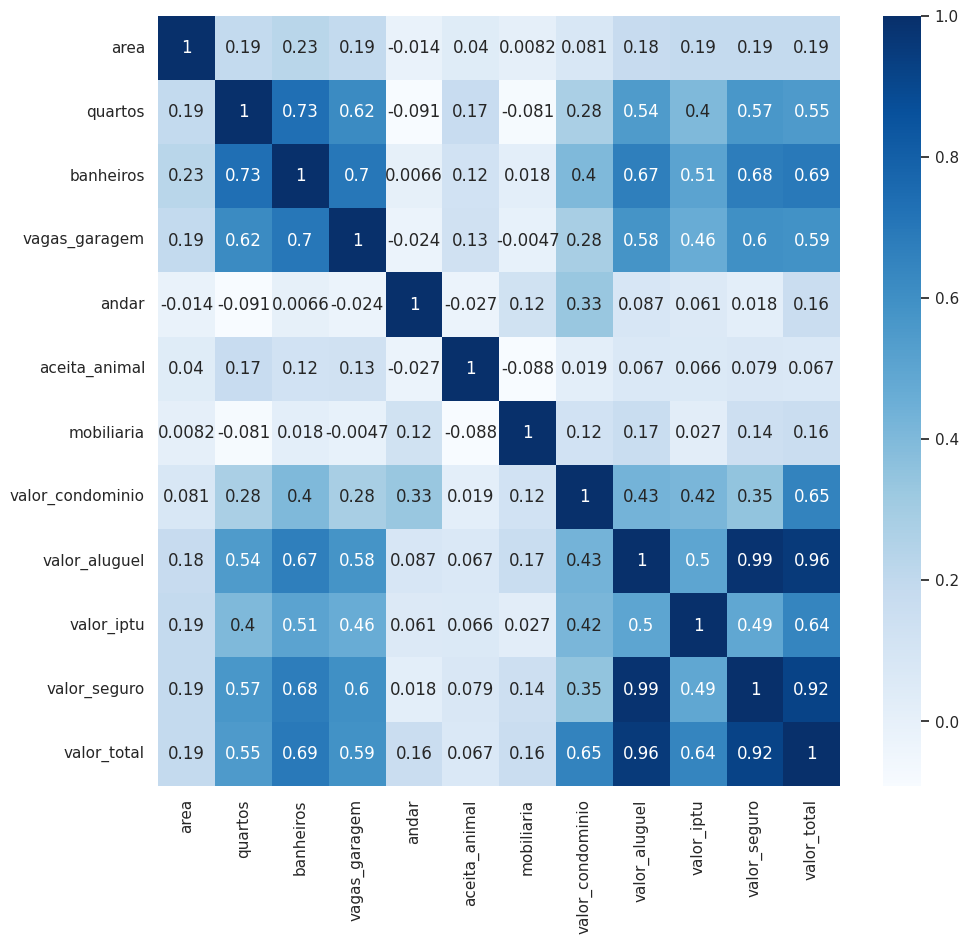

In [ ]:
corr = dados.drop(['cidade'], axis=1).corr()

plt.figure(figsize=(11,10))

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues", annot=True)

Ao visualizar a matriz de correlação, podemos chegar a algumas conclusões:

1: Valor de condominio, aluguel, iptu e seguro são a composição para o valor total de aluguel, logo possuem uma menção positiva entre si, porém como nosso alvo é o valor total para treinar o modelo, não devemos utilizar estas variaveis para treinamento para não influenciar no alvo.

2: As variaveis quartos, banheiros e vagas de garagem possuem composição positiva direta com a área, o que faz sentido visto que quanto maior a área de um imóvel maior o numero de comodos e vagas.

3: A variavel andar é peculiar, visto que não interfere na área diretamente, tendo mais correlações negativas que positivas mas influencia no preço do aluguel, o que pode ser um fator a ser considerado para determinar o valor do aluguel.

4: As variáveis aceita_animal e mobiliaria quase não são relevantes para determinação de área ou valor, visto que em sua grande maioria as correlações são negativas e longe das extremidades (-1,1)

# 2. Pré processamento

Nesta etapa, realizaremos as alterações na base de dados para transformar os dados de texto em campos numéricos para utilização nos modelos de machine learning.
Esta etapa é importante para que o modelo entenda as informações de forma categórica e consiga utilizar as informações de forma mais precisa.

**IMPORTANTE: PARA ESTE CONJUNTO DE DADOS, O QUE FARIA SENTIDO EM RELAÇÃO A PRÉ PROCESSAMENTO SERIA ALTERAR O CAMPO CIDADE, TRANSFORMANDO INFORMAÇÕES DE LINHAS EM COLUNAS (CRIANDO UMA CODIFICAÇÃO CATEGÓRICA) PARA SER UTILIZADO NO PROCESSAMENTO DO MODELO **

#2.1 Tratamento de Outliers

Utilziaremos Winsorização para realizar o tratamento de Outliers para garantir que o modelo preserve a realidade dos dados sem considerar distorções.

In [ ]:
# Função para Winsorização
def winsorize_data(df, col, lower_percentile=0.025, upper_percentile=0.975):
    """
    Aplica a Winsorização para uma coluna, limitando os valores ao intervalo de percentis definidos.

    Parameters:
    - df: DataFrame contendo os dados
    - col: nome da coluna para Winsorização
    - lower_percentile: percentil inferior (default 2.5%)
    - upper_percentile: percentil superior (default 97.5%)

    Returns:
    - df: DataFrame com a coluna Winsorizada
    """
    # Calcular os percentis de 2,5% e 97,5%
    lower = df[col].quantile(lower_percentile)
    upper = df[col].quantile(upper_percentile)

    # Limitar os valores da coluna para o intervalo entre os percentis
    df[col] = np.where(df[col] < lower, lower, df[col])  # Valores abaixo do limite inferior
    df[col] = np.where(df[col] > upper, upper, df[col])  # Valores acima do limite superior

    return df

A Winsorização é uma técnica que limita os valores extremos de uma variável dentro de um intervalo de percentis, evitando que os outliers distorçam as análises e os modelos de machine learning. Ela é particularmente útil em contextos onde os dados envolvem valores financeiros (aluguel), áreas de imóveis, entre outros, que podem ter variabilidade extrema. A principal vantagem da Winsorização é que ela preserva a amostra completa e limita a influência dos outliers sem perder registros importantes.

In [ ]:
cols_numericas = ['area', 'quartos', 'banheiros', 'vagas_garagem', 'andar',
                  'valor_condominio', 'valor_aluguel', 'valor_iptu', 'valor_seguro', 'valor_total']

# Aplicar Winsorização para cada coluna numérica
for col in cols_numericas:
    dados = winsorize_data(dados, col)

# Verificar as estatísticas após a Winsorização
dados.describe()

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,137.331961,2.487412,2.223584,1.581563,4.953018,0.777913,0.243706,884.097988,3863.682171,305.420402,52.662424,5127.416153
std,115.109951,1.110666,1.366034,1.492655,5.051239,0.415669,0.429338,984.059010,3276.034073,434.541609,45.159749,4206.791549
min,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,750.000000,0.000000,10.000000,979.200000
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.000000
50%,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,560.000000,2650.000000,125.000000,36.000000,3578.000000
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,1235.000000,5000.000000,375.000000,68.000000,6758.000000
max,500.000000,5.000000,6.000000,6.000000,19.000000,1.000000,1.000000,4000.000000,14000.000000,1896.000000,191.000000,17519.000000


Ao realizar o processo de tratamento de Outliers, podemos notar pelas médias a movimentação em relação a base original, exemplificando as variaveis área e valor total onde suas médias de 149.15 e valor 5198.13 representam uma suavização para 137.33 e 5127.41 respectivamente.

Analisando novamente a dispersão entre as variaveis, após o processamento dos Outliers, notamos a alteração de comportamento dos dados:

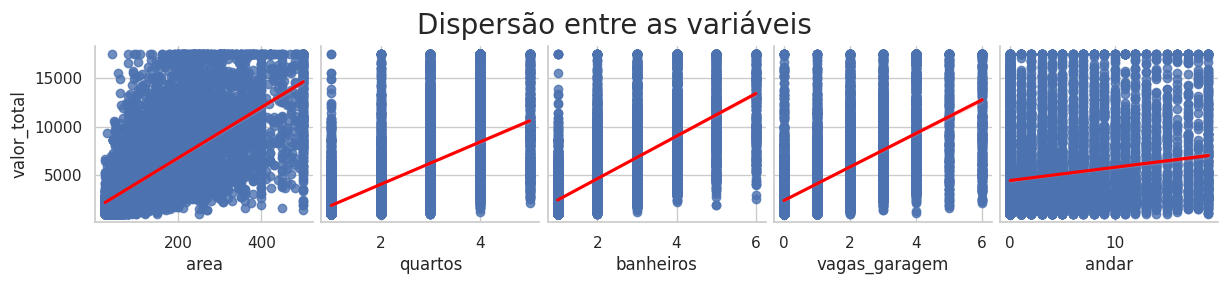

In [ ]:
#graficos das variaveis do banco
ax = sns.pairplot(dados.loc[:,['area', 'quartos', 'banheiros', 'vagas_garagem', 'andar', 'valor_total']],
                     y_vars='valor_total',
                     x_vars=['area', 'quartos', 'banheiros', 'vagas_garagem', 'andar'],
                     kind='reg',
                     plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1.1) # o argumento y indica a posição do titulo em relação ao eixo y
plt.show()

In [ ]:
dados.head(10) # visualizando as 10 primeiras linhas com as alterações de outlier

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70.0,2.0,1.0,1.0,7.0,1,1,2065.0,3300.0,211.0,42.0,5618.0
1,São Paulo,320.0,4.0,4.0,0.0,19.0,1,0,1200.0,4960.0,1750.0,63.0,7973.0
2,Porto Alegre,80.0,1.0,1.0,1.0,6.0,1,0,1000.0,2800.0,0.0,41.0,3841.0
3,Porto Alegre,51.0,2.0,1.0,0.0,2.0,1,0,270.0,1112.0,22.0,17.0,1421.0
4,São Paulo,25.0,1.0,1.0,0.0,1.0,0,0,0.0,800.0,25.0,11.0,979.2
5,São Paulo,376.0,3.0,3.0,6.0,0.0,1,0,0.0,8000.0,834.0,121.0,8955.0
6,Rio de Janeiro,72.0,2.0,1.0,0.0,7.0,1,0,740.0,1900.0,85.0,25.0,2750.0
7,São Paulo,213.0,4.0,4.0,4.0,4.0,1,0,2254.0,3223.0,1735.0,41.0,7253.0
8,São Paulo,152.0,2.0,2.0,1.0,3.0,1,1,1000.0,14000.0,250.0,191.0,16440.0
9,Rio de Janeiro,35.0,1.0,1.0,0.0,2.0,1,1,590.0,2300.0,35.0,30.0,2955.0


#3. Preparação dos modelos

In [ ]:
# Definir o estilo dos gráficos
sns.set(style="whitegrid")

#3.1 Definindo variáveis que serão utilizadas pelos modelos

In [ ]:
# Modelo 1: X = 'Área'
X1 = dados[['area']]  # Variável preditora (Área)
# Modelo 2: X = ['Área', 'Mobiliado']
X2 = dados[['area', 'mobiliaria']]  # Variáveis preditoras (Área + Mobiliado)
# Modelo 3: X = ['Área', 'Mobiliado', 'quartos']
X3 = dados[['area', 'mobiliaria', 'quartos']]  # Variáveis preditoras (Área + Mobiliado + Quartos)

yT = dados['valor_total']  # Variável alvo (Valor Total)

##3.2 Definindo funções para utilização dos modelos

In [ ]:
# Função para calcular as métricas de erro
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [ ]:
# Função para treinar e avaliar o modelo
def avaliar_modelo(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular as métricas de erro
    mse, mae, rmse, r2 = calcular_metricas(y_test, y_pred)

    return mse, mae, rmse, r2, y_pred

In [ ]:
# Função para buscar o melhor K com GridSearchCV e gerar gráficos
def knn_localizar_k(X_train, y_train, X_test, y_test, grafico=True):
    # Definir o intervalo de valores de K a serem testados
    param_grid = {'n_neighbors': list(range(1, 21))}  # Testando valores de k entre 1 e 20

    # Configurar o GridSearchCV para encontrar o melhor K
    grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Obter o melhor valor de K
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Melhor valor de K: {best_k}")

    # Obter o desempenho do modelo para diferentes valores de K
    k_values = list(range(1, 21))
    mse_values = -grid_search.cv_results_['mean_test_score']  # Resultados negativos, pois estamos maximizando o erro

    if grafico:
      # Gerar gráfico para o desempenho de diferentes valores de k
      plt.figure(figsize=(10, 6))
      plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b', label='Erro Quadrático Médio (EQM)')
      plt.xlabel('Valor de K')
      plt.ylabel('Erro Quadrático Médio (EQM)')
      plt.title('Desempenho do KNN para diferentes valores de K')
      plt.grid(True)
      plt.legend()
      plt.show()

    # Avaliar o modelo com o melhor K encontrado
    best_knn = grid_search.best_estimator_
    mse_best_knn, mae_best_knn, rmse_best_knn, r2_best_knn, y_pred = avaliar_modelo(best_knn, X_train, X_test, y_train, y_test)

    return best_knn, best_k, mse_best_knn, mae_best_knn, rmse_best_knn, r2_best_knn, mse_values


In [ ]:
# Função para plotar o gráfico de dispersão para KNN (Real vs Predito)
def plot_resultados_knn(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))

    # Gráfico de Dispersão: Real vs Previsto
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Previsões")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha Ideal')
    plt.title(f'{model_name} - Valores Reais vs Valores Preditos')
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Função para visualizar o mapa de decisão KNN
def plot_mapa_decisao_knn(X_train, y_train, model):
    # Criar um grid de pontos
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prever os valores para cada ponto no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotar a superfície de decisão
    plt.contourf(xx, yy, Z, alpha=0.5)

    # Plotar os pontos de dados
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label="Treinamento")

    plt.title('Mapa de Decisão do KNN (Regressão)')
    plt.xlabel('Área')
    plt.ylabel('Mobiliado')
    plt.colorbar(label='Valor Predito')
    plt.legend()
    plt.show()


In [ ]:
# Função para exibir gráficos de regressão linear
def plot_resultados_regressao(y_test, y_pred, model_name, X_test):
    plt.figure(figsize=(14, 6))

    # Gráfico de dispersão (y_true vs y_pred)
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha 45 graus
    plt.xlabel('Valor Real (y_true)')
    plt.ylabel('Valor Predito (y_pred)')
    plt.title(f'{model_name} - Dispersão: y_true vs y_pred')

    # Gráfico de resíduos (erro)
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Valor Predito (y_pred)')
    plt.ylabel('Resíduos (Erro)')
    plt.title(f'{model_name} - Resíduos')

    plt.tight_layout()
    plt.show()

# 4. Avaliação dos modelos

Neste processo dividiremos dados de teste e treino e realizaremos os comparativos entre todos os modelos.

In [ ]:
# Inicializar arrays para armazenar os resultados
results_knn_mse = np.array([])
results_knn_mae = np.array([])
results_knn_rmse = np.array([])
results_knn_r2 = np.array([])

results_lr_mse = np.array([])
results_lr_mae = np.array([])
results_lr_rmse = np.array([])
results_lr_r2 = np.array([])

# Dividir os dados em treino e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, yT, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, yT, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, yT, test_size=0.2, random_state=42)

# Escalonamento para KNN (não necessário para Regressão Linear)
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

##4.1 Avaliando Modelo 1 - Área

Modelo 1: KNN com 'Área' como preditor
Melhor valor de K: 20


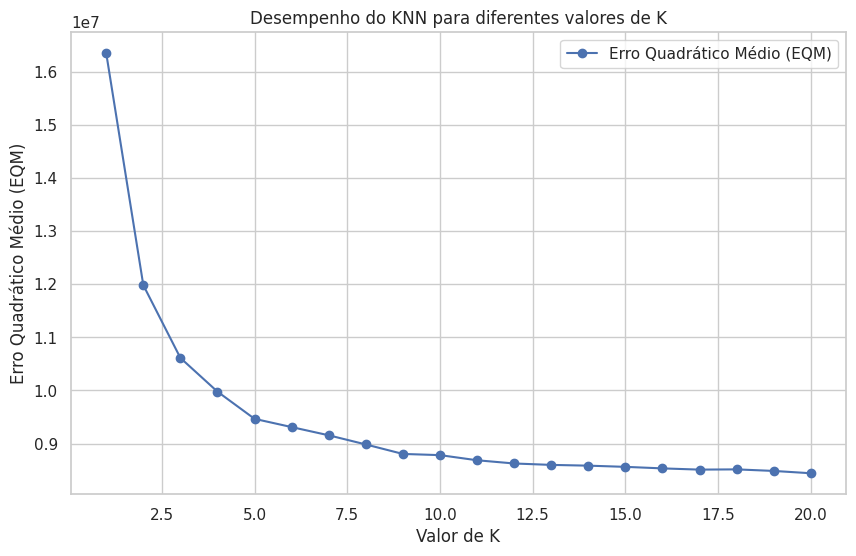

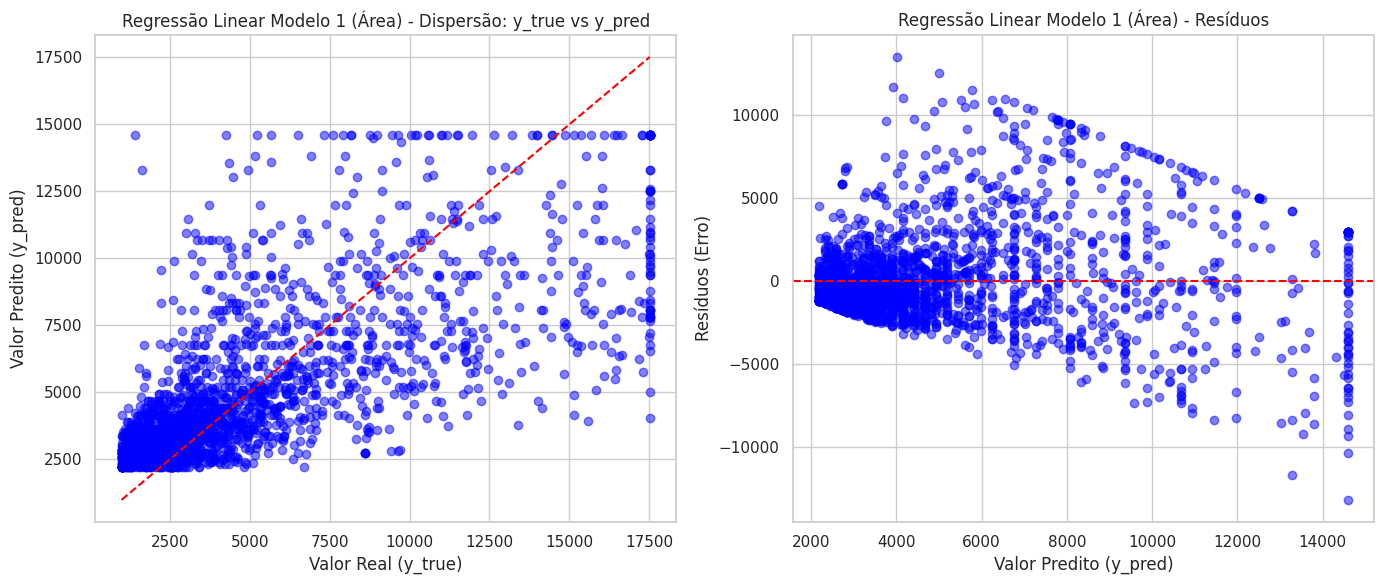

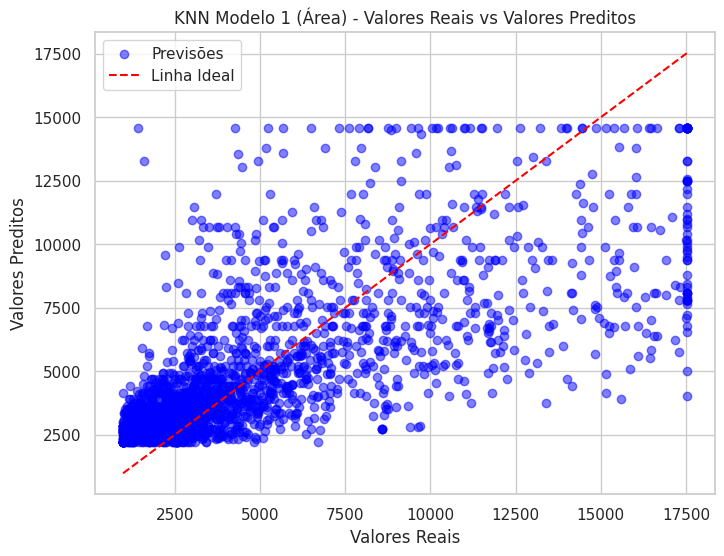

In [ ]:
## Modelo 1: KNN com 'Área' como preditor
print("Modelo 1: KNN com 'Área' como preditor")
knn_model1, best_k1, mse_knn1, mae_knn1, rmse_knn1, r2_knn1, mse_knn1_values_temp = knn_localizar_k(X_train1_scaled, y_train1, X_test1_scaled, y_test1)

# Regressão Linear - Modelo 1
lr_model1 = LinearRegression()
mse_lr1, mae_lr1, rmse_lr1, r2_lr1, y_pred_lr1 = avaliar_modelo(lr_model1, X_train1, X_test1, y_train1, y_test1)

# Armazenar resultados
results_knn_mse = np.append(results_knn_mse, mse_knn1)
results_knn_mae = np.append(results_knn_mae, mae_knn1)
results_knn_rmse = np.append(results_knn_rmse, rmse_knn1)
results_knn_r2 = np.append(results_knn_r2, r2_knn1)

results_lr_mse = np.append(results_lr_mse, mse_lr1)
results_lr_mae = np.append(results_lr_mae, mae_lr1)
results_lr_rmse = np.append(results_lr_rmse, rmse_lr1)
results_lr_r2 = np.append(results_lr_r2, r2_lr1)

# Plotando resultados da regressão linear para o modelo 1
plot_resultados_regressao(y_test1, y_pred_lr1, 'Regressão Linear Modelo 1 (Área)', X_test1)

# Plotando os resultados do KNN Modelo 1
plot_resultados_knn(y_test1, y_pred_lr1, "KNN Modelo 1 (Área)")

##4.2 Avaliando Modelo 2 - Área + Mobiliado (mobiliaria)

Modelo 2: KNN com 'Área' + 'Mobiliado' como preditores
Melhor valor de K: 19


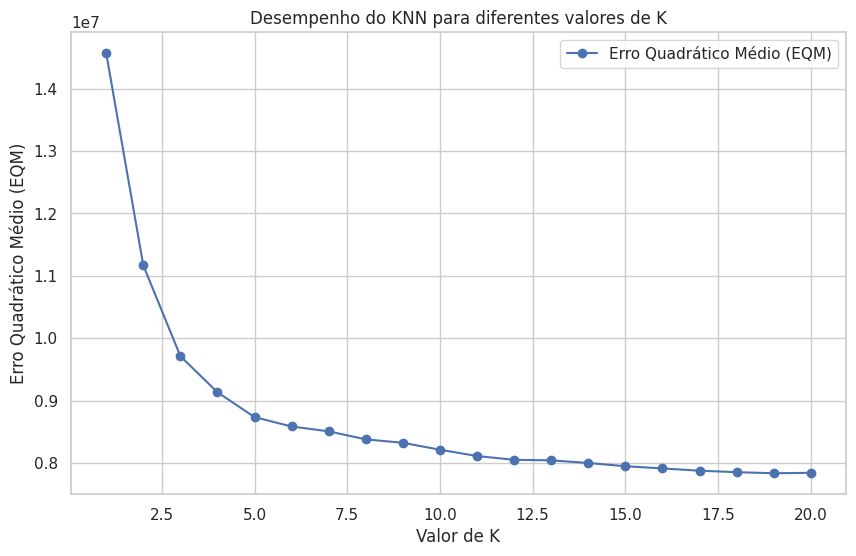

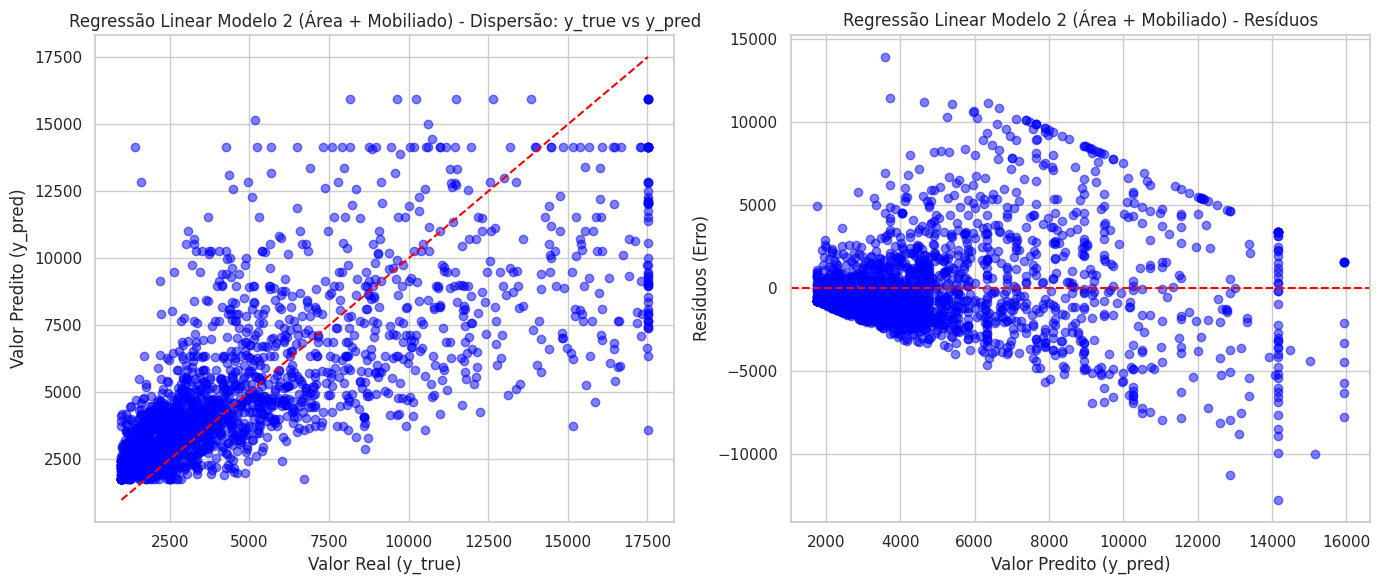

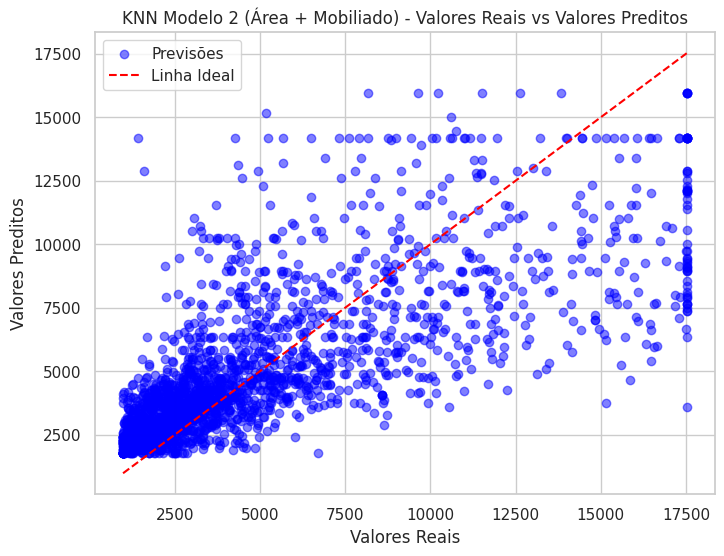

In [ ]:
## Modelo 2: KNN com 'Área' + 'Mobiliado' como preditores
print("Modelo 2: KNN com 'Área' + 'Mobiliado' como preditores")
knn_model2, best_k2, mse_knn2, mae_knn2, rmse_knn2, r2_knn2, mse_knn2_values_temp = knn_localizar_k(X_train2_scaled, y_train2, X_test2_scaled, y_test2)

# Regressão Linear - Modelo 2
lr_model2 = LinearRegression()
mse_lr2, mae_lr2, rmse_lr2, r2_lr2, y_pred_lr2 = avaliar_modelo(lr_model2, X_train2, X_test2, y_train2, y_test2)

# Armazenar resultados
results_knn_mse = np.append(results_knn_mse, mse_knn2)
results_knn_mae = np.append(results_knn_mae, mae_knn2)
results_knn_rmse = np.append(results_knn_rmse, rmse_knn2)
results_knn_r2 = np.append(results_knn_r2, r2_knn2)

results_lr_mse = np.append(results_lr_mse, mse_lr2)
results_lr_mae = np.append(results_lr_mae, mae_lr2)
results_lr_rmse = np.append(results_lr_rmse, rmse_lr2)
results_lr_r2 = np.append(results_lr_r2, r2_lr2)

# Plotando resultados da regressão linear para o modelo 2
plot_resultados_regressao(y_test2, y_pred_lr2, 'Regressão Linear Modelo 2 (Área + Mobiliado)', X_test2)

# Plotando os resultados do KNN Modelo 2
plot_resultados_knn(y_test2, y_pred_lr2, "KNN Modelo 2 (Área + Mobiliado)")

##4.3 Avaliando Modelo 3 - Área + Mobiliado + Quartos

Modelo 3: KNN com 'Área' + 'Mobiliado' + 'quartos' como preditores
Melhor valor de K: 20


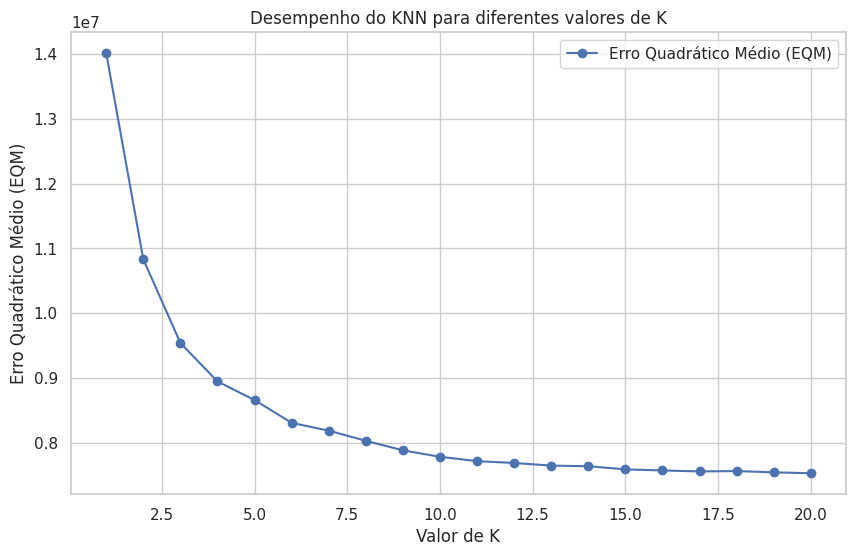

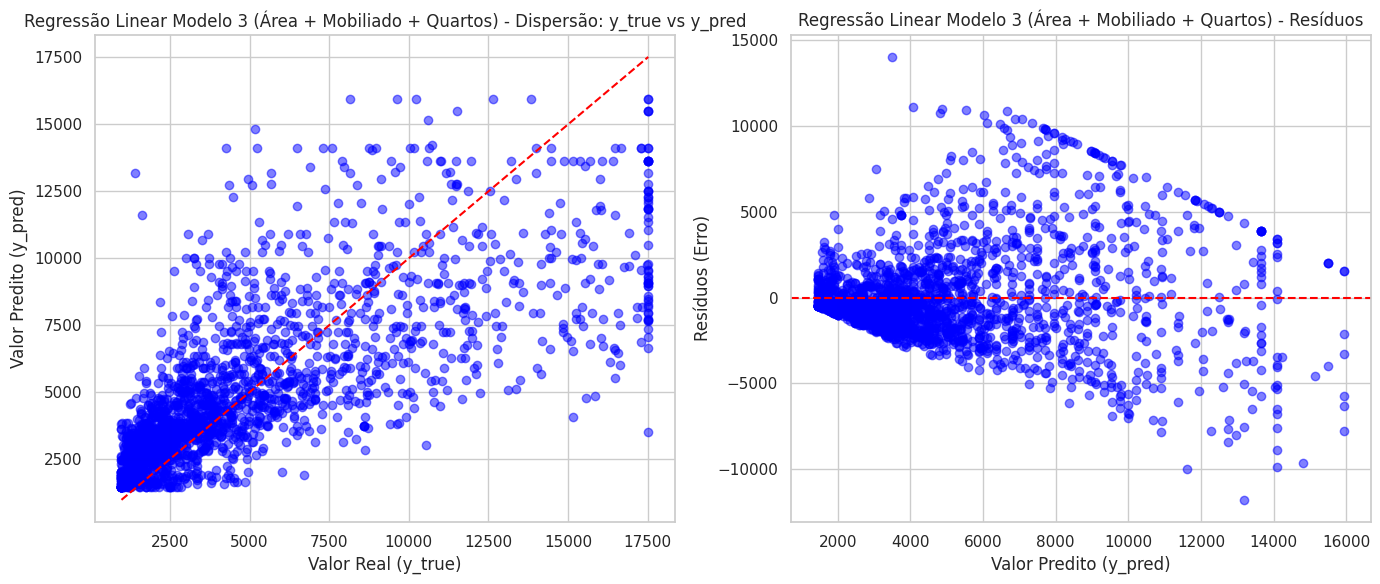

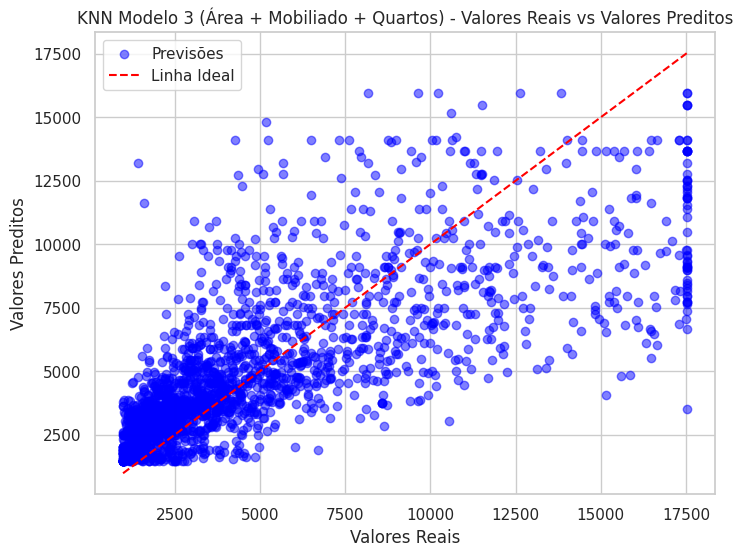

In [ ]:
## Modelo 3: KNN com 'Área' + 'Mobiliado' + 'quartos' como preditores
print("Modelo 3: KNN com 'Área' + 'Mobiliado' + 'quartos' como preditores")
knn_model3, best_k3, mse_knn3, mae_knn3, rmse_knn3, r2_knn3, mse_knn3_values_temp = knn_localizar_k(X_train3_scaled, y_train3, X_test3_scaled, y_test3)

# Regressão Linear - Modelo 3
lr_model3 = LinearRegression()
mse_lr3, mae_lr3, rmse_lr3, r2_lr3, y_pred_lr3 = avaliar_modelo(lr_model3, X_train3, X_test3, y_train3, y_test3)

# Armazenar resultados
results_knn_mse = np.append(results_knn_mse, mse_knn3)
results_knn_mae = np.append(results_knn_mae, mae_knn3)
results_knn_rmse = np.append(results_knn_rmse, rmse_knn3)
results_knn_r2 = np.append(results_knn_r2, r2_knn3)

results_lr_mse = np.append(results_lr_mse, mse_lr3)
results_lr_mae = np.append(results_lr_mae, mae_lr3)
results_lr_rmse = np.append(results_lr_rmse, rmse_lr3)
results_lr_r2 = np.append(results_lr_r2, r2_lr3)


# Plotando resultados da regressão linear para o modelo 3
plot_resultados_regressao(y_test3, y_pred_lr3, 'Regressão Linear Modelo 3 (Área + Mobiliado + Quartos)', X_test3)

# Plotando os resultados do KNN Modelo 3
plot_resultados_knn(y_test3, y_pred_lr3, "KNN Modelo 3 (Área + Mobiliado + Quartos)")


#5. Comparando métricas e modelos

Comparando os Modelos...


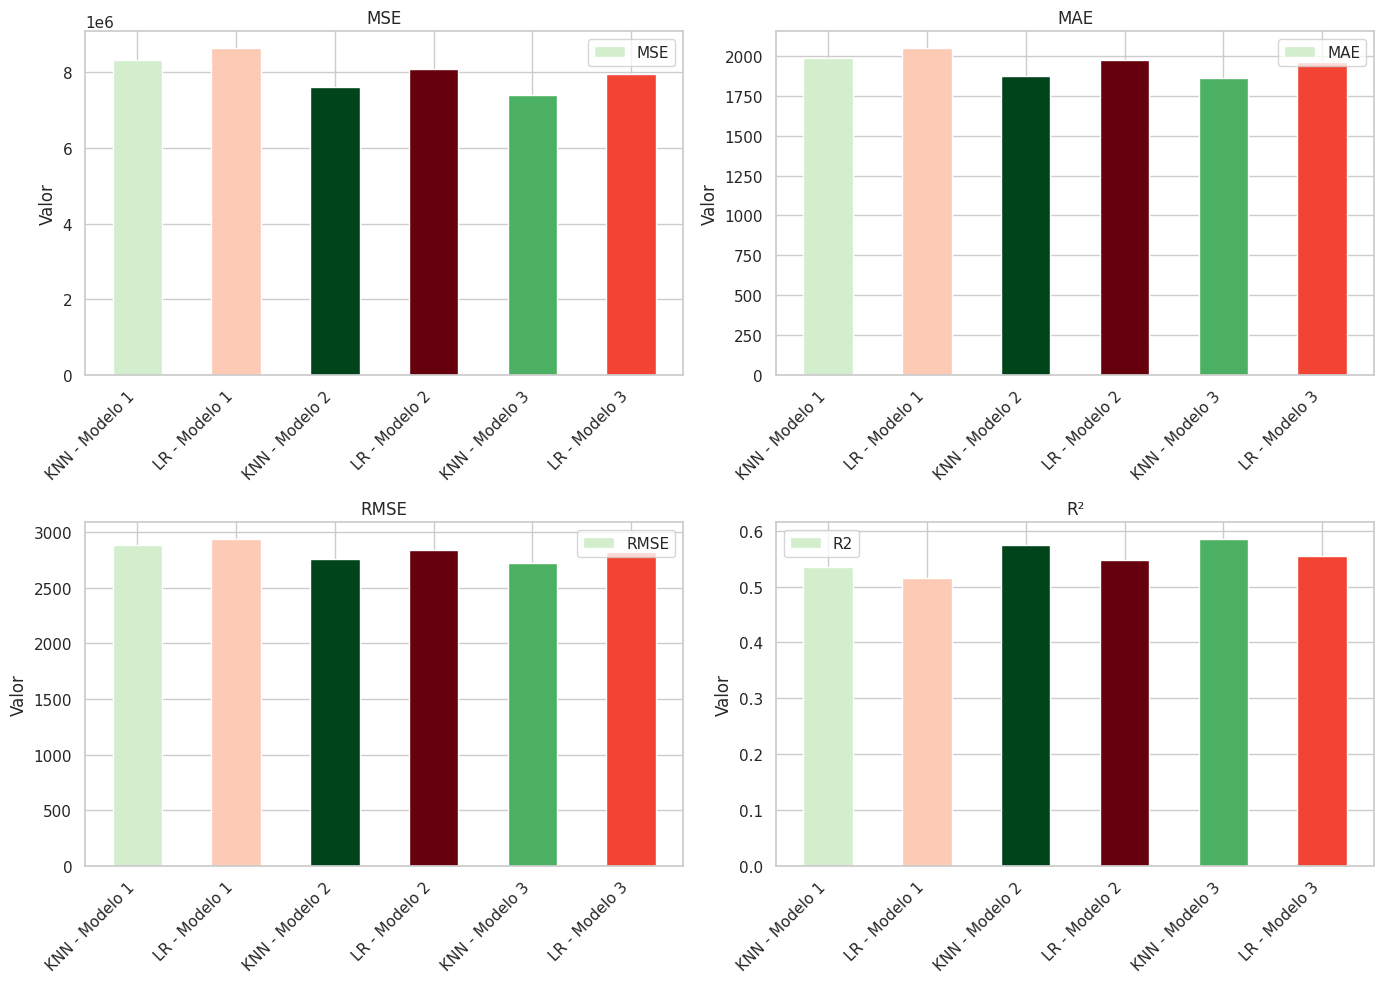

In [ ]:
# Comparação de todos os modelos (Métricas de erro)
print("Comparando os Modelos...")

# Dados de comparação
comparison_data = {
    'MSE': [results_knn_mse[0], results_lr_mse[0], results_knn_mse[1], results_lr_mse[1], results_knn_mse[2], results_lr_mse[2]],
    'MAE': [results_knn_mae[0], results_lr_mae[0], results_knn_mae[1], results_lr_mae[1], results_knn_mae[2], results_lr_mae[2]],
    'RMSE': [results_knn_rmse[0], results_lr_rmse[0], results_knn_rmse[1], results_lr_rmse[1], results_knn_rmse[2], results_lr_rmse[2]],
    'R2': [results_knn_r2[0], results_lr_r2[0], results_knn_r2[1], results_lr_r2[1], results_knn_r2[2], results_lr_r2[2]]
}

# Modelos e suas labels
models = ['KNN - Modelo 1', 'LR - Modelo 1', 'KNN - Modelo 2', 'LR - Modelo 2', 'KNN - Modelo 3', 'LR - Modelo 3']

# Criando os gráficos em uma grade 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Lista de títulos das métricas
metric_titles = ['MSE', 'MAE', 'RMSE', 'R²']

# Definir os gradientes de cores para KNN e LR
knn_colors = cm.Greens(np.linspace(0.2, 1, 3))  # Gradiente de azul para KNN
lr_colors = cm.Reds(np.linspace(0.2, 1, 3))  # Gradiente de vermelho para LR

# Laço para iterar sobre as métricas e plotar os gráficos
for i, metric in enumerate(comparison_data):
    ax = axes[i // 2, i % 2]  # Acessando o subplot (linha, coluna)

    # Pegando os valores para a métrica atual (temos 6 valores por métrica)
    metric_values = comparison_data[metric]

    # Posições das barras para cada gráfico de métrica (6 barras no total)
    indices = np.arange(len(models))  # 6 barras, uma para cada modelo

    # Plotando as barras com cores gradientes
    for j, model in enumerate(models):
        if 'KNN' in model:
            ax.bar(indices[j], metric_values[j], 0.5, color=knn_colors[j % 3])  # KNN com gradiente azul
        else:
            ax.bar(indices[j], metric_values[j], 0.5, color=lr_colors[(j - 1) % 3])  # LR com gradiente vermelho

    # Configurações do gráfico
    ax.set_title(metric_titles[i])
    ax.set_ylabel('Valor')

    # Ajustando o eixo X para mostrar as labels corretamente
    ax.set_xticks(indices)
    ax.set_xticklabels(models, rotation=45, ha='right')  # Colocando o nome dos modelos no eixo X
    ax.legend([metric])  # Adiciona a legenda para a métrica

# Ajuste para o layout
plt.tight_layout()
plt.show()

In [ ]:
#Exibindo os dados de resultados de métricas dos modelos
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(2)
comparison_df

,MSE,MAE,RMSE,R2
0,8319879.97,1986.74,2884.42,0.53
1,8652234.46,2053.69,2941.47,0.52
2,7616452.33,1878.04,2759.79,0.57
3,8080559.54,1974.36,2842.63,0.55
4,7406663.03,1860.33,2721.52,0.59
5,7960606.22,1965.58,2821.45,0.55


Com base na análise das métricas de desempenho dos modelos KNN e LR (Regressão Linear) aplicados à previsão de valores de aluguel de imóveis, podemos fazer as seguintes observações para cada uma das 4 métricas utilizadas: MSE (Erro Quadrático Médio), MAE (Erro Absoluto Médio), RMSE (Raiz do Erro Quadrático Médio) e R² (Coeficiente de Determinação).

Análises por Gráficos:
 :
*  MSE - EQM
  * KNN tende a ter valores mais baixos de MSE em todos os modelos, indicando que esse modelo apresenta um erro menor na previsão dos valores de aluguel em comparação com a Regressão Linear (LR).

  * KNN - Modelo 3 (o melhor entre os KNN) apresenta o menor MSE geral (entre todos os modelos KNN e LR), sugerindo que esse modelo é o mais eficaz em prever com menor erro quadrático.

* MAE - EAM

  * O MAE segue uma tendência semelhante à do MSE: KNN novamente apresenta valores menores em todos os modelos quando comparado ao LR.

  * Como o MAE é menos sensível a erros grandes que o MSE, a análise é semelhante. O KNN - Modelo 3 apresenta o melhor desempenho, com um erro absoluto médio mais baixo.

* RMSE - REQM

  * A análise para RMSE é muito similar à do MSE, já que ambas as métricas estão relacionadas e o KNN apresenta consistentemente valores menores de RMSE, o que significa que ele tem um erro mais controlado e distribuído ao longo das previsões

  * O KNN - Modelo 3 apresenta o menor RMSE, indicando que ele não apenas tem o menor erro quadrático médio, mas também que o erro está mais bem distribuído nas previsões. Isso faz com que o KNN seja superior para este tipo de modelo de previsão, pois evita grandes discrepâncias nas previsões de aluguel.

* R² Score - Coeficinete de Determinação
  > O R² mede a proporção da variação nos dados que é explicada pelo modelo. Um R² mais alto significa que o modelo consegue explicar melhor a variação dos dados

  * KNN mostra consistentemente valores mais altos de R² em todos os modelos, indicando que ele é mais capaz de explicar a variabilidade nos dados.

  * Tendo como objetivo encontrar um modelo que explique a variabilidade nos valores de aluguel, o KNN - Modelo 3 é o que tem o maio R2, o que indica ser o mais adequado para este cenário

#6. Testando o resultado dos modelos

Criamos uma função para utilizar o melhor modelo (3) e que retornará os valores de aluguel para Regressão Linear e KNN. O intuito de trazer os dois é mostrar a diferença entre o resultado dos dois modelos.

Lembrando que o melhor modelo avaliado é o KNN - Modelo 3.

In [ ]:
# Função para realizar as previsões com base na entrada do usuário
def predict_rent(area, mobiliado, quartos, scaler, lr_model, knn_model):
    # Organizando a entrada para as variáveis independentes (X)
    input_data = np.array([[area, mobiliado, quartos]])

    # Escalonar os dados de entrada (somente para KNN)
    input_scaled = scaler.transform(input_data)

    # Previsão utilizando Regressão Linear
    pred_lr = lr_model.predict(input_data)[0]

    # Previsão utilizando KNN
    pred_knn = knn_model.predict(input_scaled)[0]

    return pred_lr, pred_knn

In [ ]:
# Função de predição do usuário (Exemplo de entrada)
print("\nTeste de previsão de aluguel:")
area = float(input("Informe a área (m²): "))
mobiliado = int(input("Informe se o imóvel é mobiliado (1 para sim, 0 para não): "))
quartos = int(input("Informe o número de quartos: "))

# Prever os valores para o LR e KNN
pred_lr, pred_knn = predict_rent(area, mobiliado, quartos, scaler, lr_model3, knn_model3)

# Exibir os resultados
print("\nPrevisão de Aluguel:")

print(f"\nPrevisão de Aluguel:")
print(f"Regressão Linear: R${pred_lr:.2f}")
print(f"KNN: R${pred_knn:.2f}")


Teste de previsão de aluguel:
Informe a área (m²): 132
Informe se o imóvel é mobiliado (1 para sim, 0 para não): 1
Informe o número de quartos: 4

Previsão de Aluguel:

Previsão de Aluguel:
Regressão Linear: R$7092.99
KNN: R$6656.85


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Os valores de predição considerando o modelo 3 como base mostram uma variação entre os modelos e sabemos que o ideal seria apresentar o valor do resultado do KNN para apresentação de resultado mais próximo da previsão de um valor de aluguel dadas as condições.

#7. Conclusão

A análise realizada com diferentes modelos de regressão linear e KNN para prever o valor total de aluguel de imóveis, considerando variáveis como área, mobiliária e número de quartos, revela insights interessantes sobre como a complexidade do modelo afeta a precisão das previsões. Os resultados indicam que, enquanto a regressão linear foi útil para fornecer uma linha de base, o KNN demonstrou um desempenho superior em termos de menor erro e maior capacidade explicativa, especialmente quando combinamos mais variáveis. A seguir, a conclusão detalhada para o cenário completo, considerando KNN e Regressão Linear (LR).

1. Modelo com Apenas Área
No primeiro modelo, que considera apenas a área do imóvel como variável preditiva, obtivemos um erro quadrático médio (MSE) de aproximadamente 19.534.336, e um valor previsto de 5.658,28. Este valor alto de MSE indica que a previsão do valor de aluguel com base apenas na área é limitada, já que não leva em consideração fatores importantes como mobiliário e número de quartos.

Para a Regressão Linear (LR), este modelo de apenas área demonstrou um desempenho razoável, mas os modelos KNN (especialmente KNN - Modelo 3) conseguiram prever o valor do aluguel com um erro menor, com o MSE mais baixo. O KNN - Modelo 3, em comparação com a LR, apresentou uma menor variação nos erros, indicando que é mais robusto para essa tarefa.

2. Modelo com Área e Mobiliaria
Ao adicionar a variável "mobiliária", o modelo teve uma pequena melhoria na precisão, com o MSE reduzido para 19.201.113. A previsão de valor neste modelo foi de 6.980,55, ainda um pouco distante do valor real, mas já mais próximo do que no primeiro modelo. A inclusão de mobiliária como variável adicional agregou valor às previsões, mas a redução no erro não foi substancial o suficiente para garantir uma boa precisão final.

Neste cenário, a Regressão Linear ainda estava atrás do KNN, especialmente o KNN - Modelo 3, que continuou a apresentar um erro menor e uma maior capacidade de explicar a variação dos dados (R² mais alto). Embora a regressão linear tenha mostrado melhorias, o KNN continuou a ser mais eficaz em termos de erro absoluto e explicabilidade.

3. Modelo com Área, Mobiliaria e Quartos
Ao adicionar a variável "quartos" ao modelo, o MSE foi reduzido para 13.353.874 e o valor previsto foi de 5.962,28. Essa melhoria no modelo reflete a importância do número de quartos, uma variável chave para a definição do preço de aluguel. Quando incluímos múltiplas variáveis, como área, mobiliária e quartos, a previsão se torna mais precisa, já que o modelo agora leva em consideração mais aspectos que impactam o valor do aluguel.

Mesmo com a melhoria proporcionada pelas variáveis adicionais, o KNN continuou a se destacar, com KNN - Modelo 3 apresentando o menor erro entre todos os modelos testados. Ele obteve o menor MSE, MAE e RMSE, além de um R² mais alto, indicando um desempenho significativamente melhor na previsão dos valores de aluguel.

#Considerações Finais
Em resumo, os resultados obtidos com a aplicação de Regressão Linear e KNN demonstram que a complexidade do modelo e a inclusão de múltiplas variáveis têm um impacto direto na precisão das previsões. Embora a Regressão Linear tenha mostrado evolução significativa conforme mais variáveis foram adicionadas, o KNN apresentou resultados mais consistentes e com menor erro em todas as métricas (MSE, MAE, RMSE e R²).

KNN - Modelo 3 foi o modelo que apresentou o melhor desempenho geral, com o menor erro e o maior R², o que indica que ele conseguiu capturar melhor as relações entre as variáveis e os valores reais de aluguel. O modelo KNN mostrou-se mais robusto e eficaz ao lidar com as complexidades do problema de previsão de aluguel, especialmente quando consideramos as variáveis de área, mobiliária e número de quartos.

Por fim, embora a Regressão Linear seja uma ferramenta importante e útil para estabelecer um ponto de partida, o KNN demonstrou ser a escolha superior quando a precisão das previsões e a explicabilidade do modelo são prioritárias, tornando-o a melhor opção para prever o valor de aluguel de imóveis, considerando as variáveis analisadas.